In [40]:
import numpy as np
import matplotlib.pyplot as plt
from d_tree_regression import DecisionTree
from sklearn.model_selection import train_test_split

### 🧪 Creating and Analyzing Fake Data 🧪

Here, we are going to make some fake data, then take a look at it and see if the regression tree can learn from it. 📊🌳

In [41]:
data = np.zeros((2,60))
data[0] = np.arange(0,30,.5)

In [42]:
#data[1] = data[0] ** 2 + ((-1)**np.random.random_integers(1,2) * np.random.random_integers(0,5)) - (data[0] ** 3)/18
data[1] = data[0] * np.random.uniform(-2,2,60) + data[0] ** 2 - (data[0] ** 3)/27

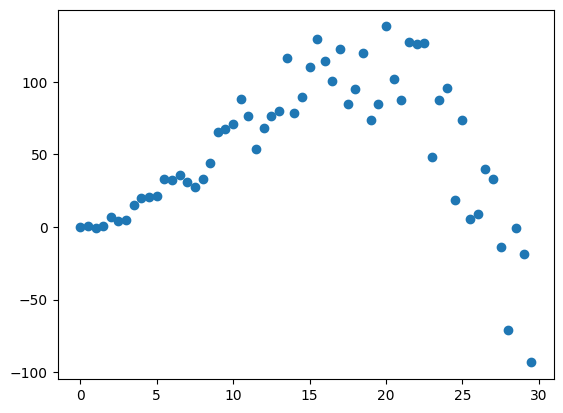

In [43]:
plt.scatter(x=data[0], y=data[1])

In [44]:
data.T[:15] #take a look at he firt 15 data points

array([[ 0.        ,  0.        ],
       [ 0.5       ,  0.65042139],
       [ 1.        , -0.44177344],
       [ 1.5       ,  0.44365976],
       [ 2.        ,  6.8498716 ],
       [ 2.5       ,  4.23601013],
       [ 3.        ,  5.07272278],
       [ 3.5       , 14.91864411],
       [ 4.        , 19.74815125],
       [ 4.5       , 20.89846008],
       [ 5.        , 21.41115062],
       [ 5.5       , 33.37792689],
       [ 6.        , 32.60791825],
       [ 6.5       , 35.5415578 ],
       [ 7.        , 30.80621915]])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data[:1].squeeze(), data[1:].squeeze(), test_size=.3)

### 📊 Exploring the Split Data 📊

Now that we've split the data, let's take a look at what they look like, just out of curiosity. Normally, with high-dimensional data, we can't do this, but since this is 2D, we can take a look, which is cool. 😎

Remember, curiosity killed the cat, but we are not cats, we are gamecocks! 🐔


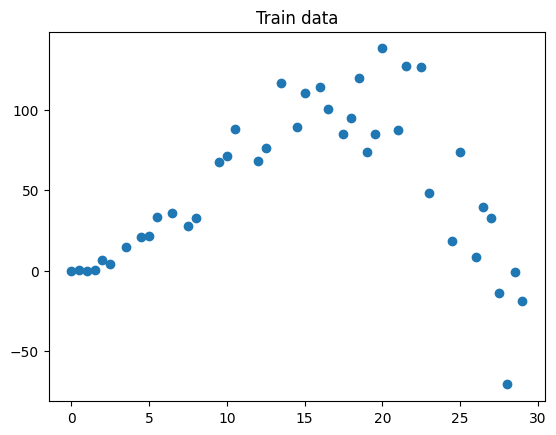

In [46]:
plt.scatter(x=X_train,y=y_train)
plt.title("Train data");

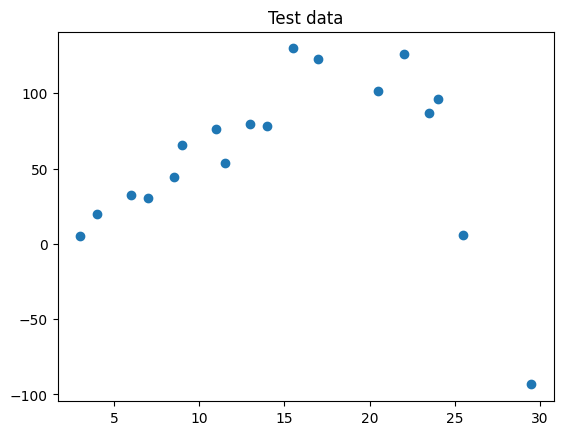

In [47]:
plt.scatter(x=X_test,y=y_test)
plt.title("Test data");


In [48]:
reg_tree = DecisionTree(max_depth=10)
reg_tree.fit(X_train, y_train)

### 🚂 Training the Model and Evaluating Predictions 🚂

Let's train the model and then look at how it predicts on the training set, just to see if decision trees memorize the data. 

📈🌳 Then we will accurately evaluate on the test set. ✅


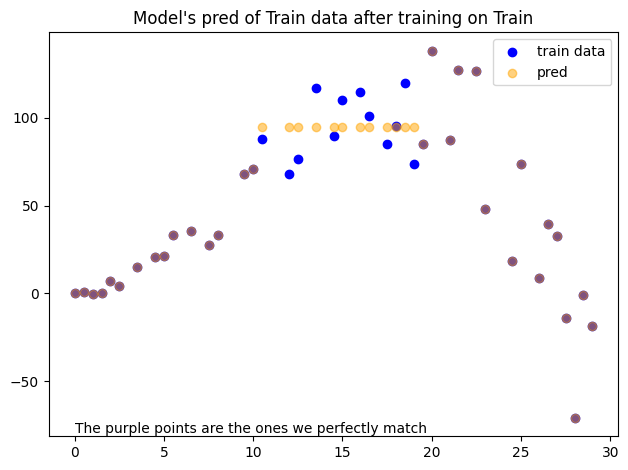

In [66]:
preds = reg_tree.predict(X_train)
plt.scatter(X_train, y_train, c='blue', label='train data')
plt.scatter(X_train, preds, c='orange', alpha=0.5, label='pred')
plt.legend()
plt.title("Model's pred of Train data after training on Train")
plt.text(X_train.min(), plt.ylim()[0], 'The purple points are the ones we perfectly match', 
         verticalalignment='bottom', horizontalalignment='left')
plt.tight_layout()
plt.show()

### 🔍 Evaluating the Model on Unseen Test Data 🔍

Now we can see the evaluation of the model on the unseen test data. The purple points are where the prediction and true values overlap. 🟣🔍


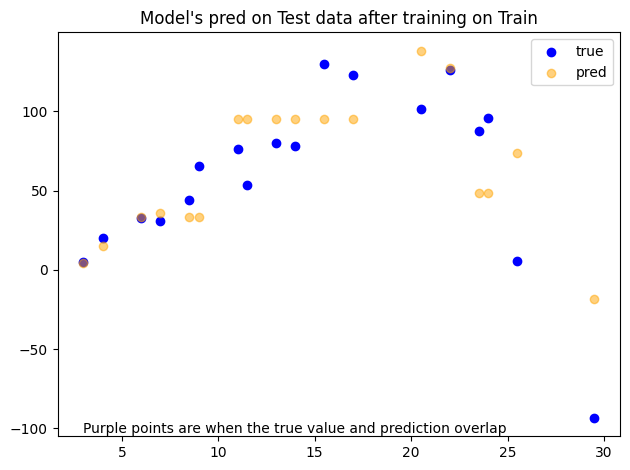

In [68]:
preds = reg_tree.predict(X_test)
plt.scatter(X_test, y_test, c='blue', label='true')
plt.scatter(X_test, preds, c='orange', alpha=0.5, label='pred')
plt.legend()
plt.title("Model's pred on Test data after training on Train")
plt.text(X_test.min(), plt.ylim()[0], 'Purple points are when the true value and prediction overlap', 
         verticalalignment='bottom', horizontalalignment='left')
plt.tight_layout()
plt.show()

In [69]:
reg_tree.print()

             level:  0     split on feature #0 with < 3.5  label if ended here is: 51.35127047279917

Level:  1   LEFT: split on feature #0 with < 2.0  label if ended here is: 1.956364906968399

Level:  2   LEFT: split on feature #0 with < 1.5  label if ended here is: 0.1630769278733194

Level:  3   LEFT: split on feature #0 with < 1.0  label if ended here is: 0.06954931652604969

Level:  4   LEFT: split on feature #0 with < 0.5  label if ended here is: 0.32521069561232613

Level:  5   LEFT: split on feature #-1 with < None  label if ended here is: 0.0

level:  5   RIGHT:  split on feature #-1 with < None  label if ended here is: 0.6504213912246523




level:  4   RIGHT:  split on feature #-1 with < None  label if ended here is: -0.4417734416465032




level:  3   RIGHT:  split on feature #-1 with < None  label if ended here is: 0.44365976191512857




level:  2   RIGHT:  split on feature #0 with < 2.5  label if ended here is: 5.542940865158558

Level:  3   LEFT: split on feature #-1 w

[51.35127047279917, 59.58375473377097, -26.056559874794317, -30.137558549103005, -9.799170934205904, 70.28879405984162, 82.49908847659742, 36.96406500546481, 34.724389977633315, 38.7440897313777, 27.039596709106906, 36.19935573862023, 96.8785695727446, 126.82047227752201, 93.35599278394723, 96.54912477282559, 97.2045907511327, 94.05356954759348, 94.80480525284675, 69.4075028673598, 26.68059971428511, 32.38398579637257, 30.308229246638838, 34.459742346106296, 19.076084938168513, 21.15480535287014, 1.956364906968399, 5.542940865158558, 0.1630769278733194, 0.06954931652604969, 0.32521069561232613]


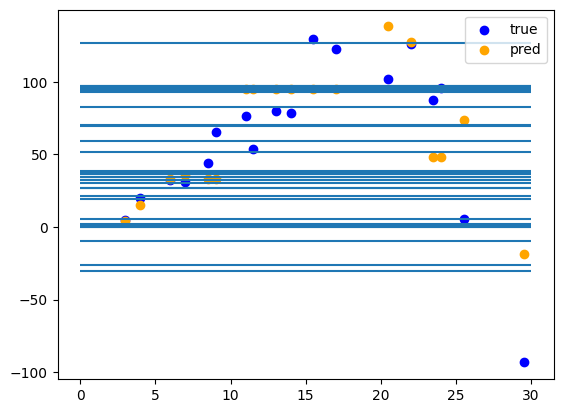

In [70]:
plt.scatter(X_test,y_test, c='blue')
plt.scatter(X_test,preds, c='orange')
plt.legend(['true','pred']);
splits = reg_tree.get_splits()
print(splits)
plt.hlines(splits,0,30)
